In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/airline-passengers.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/airline-passengers.csv',
                 index_col='Month', parse_dates = True)

# df.info()
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

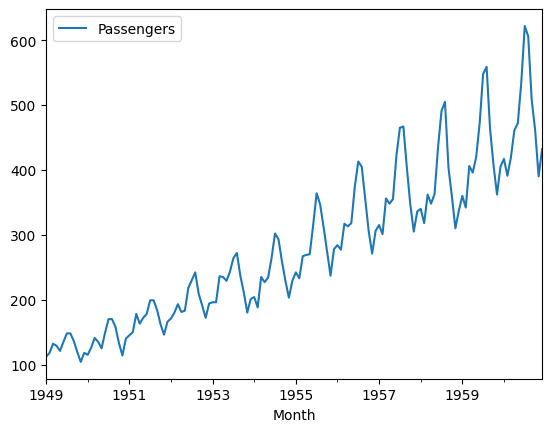

In [36]:
df.plot()
plt.show()

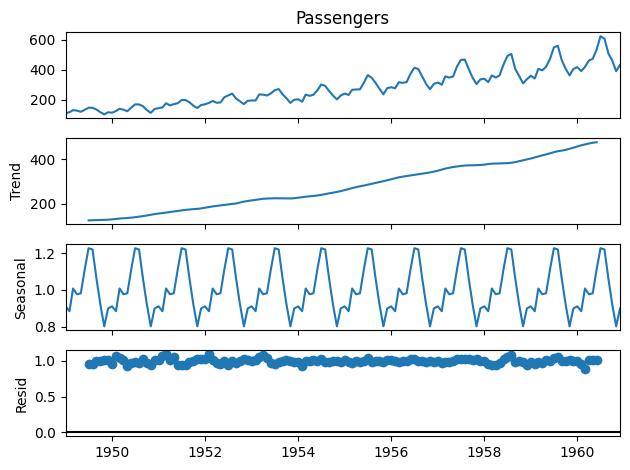

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df['Passengers'], model = 'multiplicative')
decompose_result.plot();

In [54]:
# Definir a frequencia do índice cronológico para mensal

df.index.freq = 'MS'
# Definir o valor de Alpha e o valor de m (período cronológico)
m = 12
alpha = 1/(2*m)

144


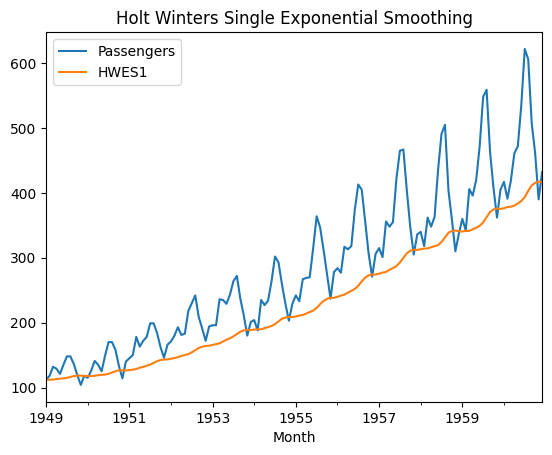

In [55]:
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df['HWES1'] = SimpleExpSmoothing(df['Passengers']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues

df[['Passengers','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');




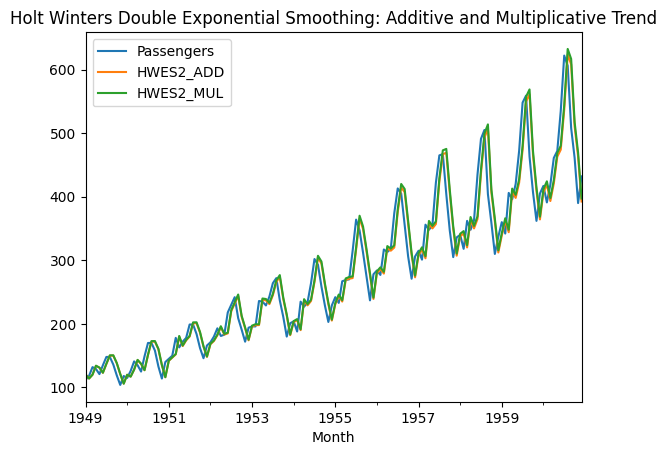

In [47]:
# # double exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['HWES2_ADD'] = ExponentialSmoothing(df['Passengers'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Passengers'],trend='mul').fit().fittedvalues
df[['Passengers','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


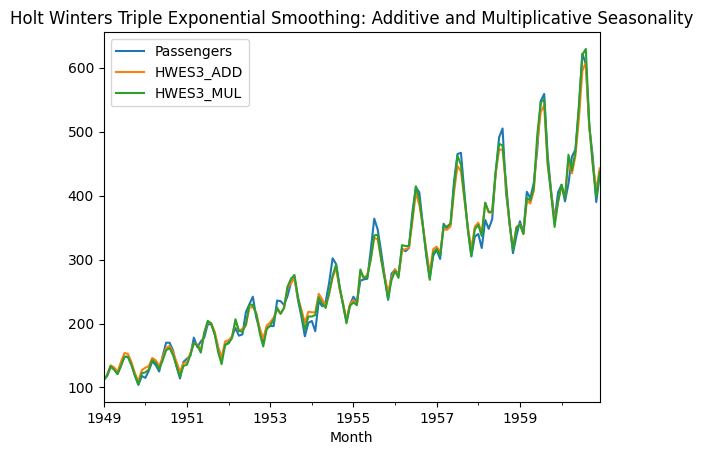

In [48]:
# # triple exponential smoothing
df['HWES3_ADD'] = ExponentialSmoothing(df['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df[['Passengers','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [59]:
########################
# avaliando o erro dos modelos
df['e'] = abs(df['HWES3_MUL'] - df['Passengers'])
df['e'].mean()



7.5042488531165095

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted Test -  Holt Winters')

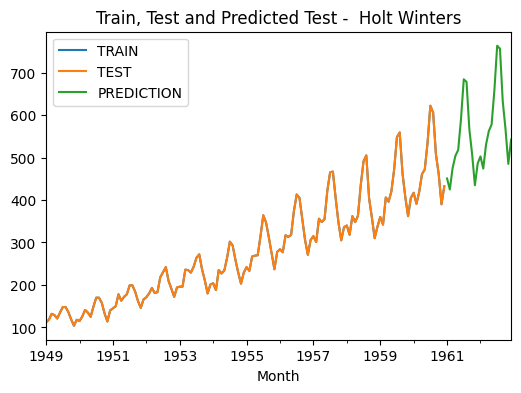

In [49]:
#TREINANDO UM MODELO PARA FORECASTING
df_train=df[:120]
df_test=df[120:]

fitted_model = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)

df['Passengers'].plot(legend=True,label='TRAIN')
df['Passengers'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test -  Holt Winters')

<Axes: >

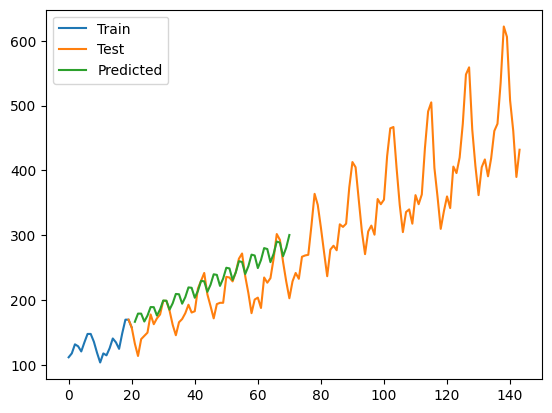

In [29]:
df_train['Passengers'].plot(legend = True, label = 'Train')
df_test['Passengers'].plot(legend = True, label = 'Test')
test_pred.plot(legend=True, label = 'Predicted')